### Imports

In [1]:
%matplotlib inline

# standard imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# feature extraction
from tsfresh.feature_extraction import extract_features, MinimalFCParameters

# ML data prep
from sklearn.model_selection import train_test_split

# ML modeling
import xgboost as xgb

# AutoML modeling
from autogluon.tabular import TabularPredictor

### Data ingest

In [2]:
data_path = 'C:/Users/m85302/Desktop/data4_local/kggl_tabular_playgrounds/4_2022_apr/'

In [3]:
df_train = pd.read_csv(data_path + 'train.csv')
df_train_label = pd.read_csv(data_path + 'train_labels.csv')

df_test = pd.read_csv(data_path + 'test.csv')

In [4]:
print(df_train.shape)
print(df_train.columns)
df_train.head(3)

(1558080, 16)
Index(['sequence', 'subject', 'step', 'sensor_00', 'sensor_01', 'sensor_02',
       'sensor_03', 'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07',
       'sensor_08', 'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12'],
      dtype='object')


,sequence,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12
0,0,47,0,-0.196291,0.112395,1.0,0.329204,-1.004660,-0.131638,-0.127505,0.368702,-0.1,-0.963873,-0.985069,0.531893,4.751492
1,0,47,1,-0.447450,0.134454,1.0,-0.658407,0.162495,0.340314,-0.209472,-0.867176,0.2,-0.301301,0.082733,-0.231481,0.454390
2,0,47,2,0.326893,-0.694328,1.0,0.330088,0.473678,1.280479,-0.094718,0.535878,1.4,1.002168,0.449221,-0.586420,-4.736147


In [5]:
print(df_train_label.shape)
print(df_train_label.columns)
df_train_label.head(3)

(25968, 2)
Index(['sequence', 'state'], dtype='object')


,sequence,state
0,0,0
1,1,1
2,2,1


In [6]:
print(df_test.shape)
print(df_test.columns)
df_test.head(3)

(733080, 16)
Index(['sequence', 'subject', 'step', 'sensor_00', 'sensor_01', 'sensor_02',
       'sensor_03', 'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07',
       'sensor_08', 'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12'],
      dtype='object')


,sequence,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12
0,25968,684,0,2.427357,19.639706,1.0,-1.466372,-1.289973,-4.207928,2.486339,-2.493893,8.0,-1.123555,-1.673048,10.980453,0.419011
1,25968,684,1,-4.950541,-21.747899,1.0,0.983186,-0.569053,1.845924,-3.887978,1.727481,-2.9,0.395231,-0.882233,-1.871399,-0.008525
2,25968,684,2,1.136012,-10.756303,1.0,1.016814,0.964157,2.454749,0.312386,1.154198,-5.6,1.114162,1.525273,-11.584362,0.139812


### Extract features from time series

In [7]:
df_train_seq_feat_extract = df_train[['sequence', 'step', 'sensor_00', 'sensor_01', 'sensor_02',
       'sensor_03', 'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07',
       'sensor_08', 'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12']]

In [8]:
df_test_seq_feat_extract = df_test[['sequence', 'step', 'sensor_00', 'sensor_01', 'sensor_02',
       'sensor_03', 'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07',
       'sensor_08', 'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12']]

In [9]:
df_X_train = extract_features(df_train_seq_feat_extract, 
                         default_fc_parameters=MinimalFCParameters(), 
                         column_id="sequence", 
                         column_sort="step")

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 20/20 [01:00<00:00,  3.04s/it]


In [10]:
df_y_submit = extract_features(df_test_seq_feat_extract , 
                             default_fc_parameters=MinimalFCParameters(), 
                             column_id="sequence", 
                             column_sort="step")

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:31<00:00,  1.56s/it]


In [11]:
df_y_train = pd.Series(df_train_label.state).astype(int)

### ML dataset creation

In [19]:
#X = df_X_train.values
#y = df_y_train.values

#print(X.shape, y.shape)

#X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8) # random_state=77
#print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

In [20]:
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(df_X_train, df_y_train, train_size=0.8) # random_state=77

df_X_train = df_X_train.reset_index(drop=True)
df_X_test = df_X_test.reset_index(drop=True)
df_y_train = df_y_train.reset_index(drop=True)
df_y_test = df_y_test.reset_index(drop=True)

In [21]:
print(df_X_train.shape, df_X_test.shape, df_y_train.shape, df_y_test.shape)
df_y_test.head(3)

(10636, 130) (2659, 130) (10636,) (2659,)


0    0
1    1
2    1
Name: state, dtype: int32

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
clf_lr1 = LogisticRegression()

In [36]:
clf_lr1.fit(df_X_train, df_y_train)

C:\Users\m85302\Anaconda3b\envs\seqDarts1\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
y_pred_lr1 = clf_lr1.predict(df_X_test)

In [39]:
y_pred = y_pred_lr1
y_test = df_y_test.values

score_accuracy = accuracy_score(y_test, y_pred)
score_precision = precision_score(y_test, y_pred)
score_recall = recall_score(y_test, y_pred)
score_f1 = f1_score(y_test, y_pred)
score_roc_auc = roc_auc_score(y_test, y_pred)
score_confmat = confusion_matrix(y_test, y_pred)
    
print('Accuracy: ', score_accuracy)
print('Precision: ', score_precision)
print('Recall: ', score_recall)
print('F1: ', score_f1)
print('ROC_AUC:', score_roc_auc)
print(score_confmat)
#viz_confusion_matrix(score_confmat)
print(" ")

#Accuracy:  0.6671681083113953
#Precision:  0.6889089269612263
#Recall:  0.5858895705521472
#F1:  0.6332366348943224
#ROC_AUC: 0.665638512213343
#[[1010  345]
# [ 540  764]]

Accuracy:  0.6671681083113953
Precision:  0.6889089269612263
Recall:  0.5858895705521472
F1:  0.6332366348943224
ROC_AUC: 0.665638512213343
[[1010  345]
 [ 540  764]]
 


In [82]:
#df_results = pd.DataFrame(columns=['Model': ['Logistic Regression]', 'Accuracy':[0.6671681083113953], 'Precision', 'Recall', 'F1', 'ROC_AUC'])

df_results = pd.DataFrame({'Model': ['Logistic Regression', 'XGBoost', 'AutoGluon'], 'Accuracy':[0,0,0]})

#df_results['Model'][0]= 'Logistic Regression'
#df_results['Accuracy'][0] = 0.6671681083113953 #score_accuracy

#df_results['Accuracy'].loc(0) = 0.6671681083113953
df_results.iloc[0, df_results.columns.get_loc('Accuracy')] = 0.6671681083113953

df_results

,Model,Accuracy
0,Logistic Regression,0.667168
1,XGBoost,0.000000
2,AutoGluon,0.000000


### XGBoost baseline

In [40]:
clf_xgb1 = xgb.XGBClassifier()
#clf_xgb1.fit(X_train, y_train)
clf_xgb1.fit(df_X_train, df_y_train)

C:\Users\m85302\Anaconda3b\envs\seqDarts1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:39:00] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [41]:
y_pred = clf_xgb1.predict(df_X_test)

In [44]:
y_test =df_y_test.values

In [45]:
score_accuracy = accuracy_score(y_test, y_pred)
score_precision = precision_score(y_test, y_pred)
score_recall = recall_score(y_test, y_pred)
score_f1 = f1_score(y_test, y_pred)
score_roc_auc = roc_auc_score(y_test, y_pred)
score_confmat = confusion_matrix(y_test, y_pred)
    
print('Accuracy: ', score_accuracy)
print('Precision: ', score_precision)
print('Recall: ', score_recall)
print('F1: ', score_f1)
print('ROC_AUC:', score_roc_auc)
print(score_confmat)
#viz_confusion_matrix(score_confmat)
print(" ")

# Accuracy:  0.8149680330951485
# Precision:  0.7963503649635036
# Recall:  0.8366564417177914
# F1:  0.8160059835452507
# ROC_AUC: 0.8153761913386004
# [[1076  279]
# [ 213 1091]]

Accuracy:  0.8149680330951485
Precision:  0.7963503649635036
Recall:  0.8366564417177914
F1:  0.8160059835452507
ROC_AUC: 0.8153761913386004
[[1076  279]
 [ 213 1091]]
 


In [83]:
df_results['Model'][1]= 'XGBoost'

#df_results['Accuracy'][1] = 0.8149680330951485

df_results.iloc[1, df_results.columns.get_loc('Accuracy')] = 0.8149680330951485

df_results

<ipython-input-83-4d2d6786637f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results['Model'][1]= 'XGBoost'


,Model,Accuracy
0,Logistic Regression,0.667168
1,XGBoost,0.814968
2,AutoGluon,0.000000


### XGBoost feature importance

In [47]:
#df_X_train.columns.to_list()

In [48]:
#clf_xgb1.get_booster().feature_names = df_X_train.columns.to_list() # use if dealing with numpy arrays

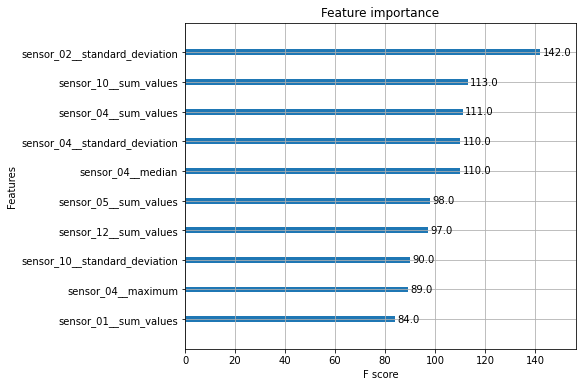

In [49]:
fig, ax = plt.subplots(figsize=(7, 6))
xgb.plot_importance(clf_xgb1, max_num_features=10, 
                    importance_type="weight", ax=ax); #"weight", gain", "cover"

How the importance is calculated: either "weight", "gain", or "cover"
    
  * "weight" is the number of times a feature appears in a tree
  * "gain" is the average gain of splits which use the feature
  * "cover" is the average coverage of splits which use the feature
     where coverage is defined as the number of samples affected by the split

### AutoGluon-1

In [50]:
df_Xy_train = df_X_train.copy()
df_Xy_train['target'] = df_y_train.values

In [52]:
print(df_Xy_train.shape)
df_Xy_train.head(3)

(10636, 131)


,sensor_00__sum_values,sensor_00__median,sensor_00__mean,sensor_00__length,sensor_00__standard_deviation,sensor_00__variance,sensor_00__root_mean_square,sensor_00__maximum,sensor_00__absolute_maximum,sensor_00__minimum,...,sensor_12__median,sensor_12__mean,sensor_12__length,sensor_12__standard_deviation,sensor_12__variance,sensor_12__root_mean_square,sensor_12__maximum,sensor_12__absolute_maximum,sensor_12__minimum,target
0,1.350850,-0.029366,0.022514,60.0,0.711416,0.506112,0.711772,2.265070,2.265070,-1.391808,...,2.038789,0.122783,60.0,12.306767,151.456503,12.307379,20.547741,23.405371,-23.405371,0
1,-0.596600,-0.147218,-0.009943,60.0,2.033090,4.133454,2.033114,6.101236,6.101236,-5.166924,...,-2.503410,0.283845,60.0,27.257205,742.955240,27.258683,78.328218,78.328218,-72.893436,0
2,-0.886399,0.043277,-0.014773,60.0,0.795872,0.633412,0.796009,3.303709,3.303709,-2.632921,...,-22.838875,0.223231,60.0,192.852018,37191.900697,192.852147,315.517903,315.517903,-296.341006,0


In [53]:
df_Xy_train['target'].value_counts() # close to balanced classes . . . close enought !

1    5419
0    5217
Name: target, dtype: int64

In [54]:
label = 'target'
metric = 'accuracy'

save_path = 'autogluon1/'

#time_limit = 120 * 60
#time_limit = 40 * 60
time_limit = 60 * 60

In [55]:
#predictor = TabularPredictor(label=COLUMN_NAME).fit(train_data=TRAIN_DATA.csv)
#predictor = TabularPredictor(label='Cover_Type').fit(train_data=df_train)
#predictor = TabularPredictor(label, eval_metric=metric).fit(df_Xy_train, time_limit=time_limit, presets='best_quality')

predictor = TabularPredictor(label, eval_metric=metric).fit(df_Xy_train, time_limit=time_limit, presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20220411_044146\"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 3600s
AutoGluon will save models to "AutogluonModels/ag-20220411_044146\"
AutoGluon Version:  0.4.0
Python Version:     3.8.5
Operating System:   Windows
Train Data Rows:    10636
Train Data Columns: 130
Label Column: target
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    18671.74 MB
	Train Data (Original)  Memory Usage: 11.06 MB (

[1000]	valid_set's binary_error: 0.174436
[1000]	valid_set's binary_error: 0.17833


	0.826	 = Validation score   (accuracy)
	33.38s	 = Training   runtime
	0.2s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 2357.86s of the 3558.36s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's binary_error: 0.174567


	0.8254	 = Validation score   (accuracy)
	34.95s	 = Training   runtime
	0.17s	 = Validation runtime
Fitting model: RandomForestGini_BAG_L1 ... Training model for up to 2322.12s of the 3522.63s of remaining time.
	0.788	 = Validation score   (accuracy)
	5.47s	 = Training   runtime
	0.94s	 = Validation runtime
Fitting model: RandomForestEntr_BAG_L1 ... Training model for up to 2315.45s of the 3515.96s of remaining time.
	0.7869	 = Validation score   (accuracy)
	7.91s	 = Training   runtime
	0.79s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 2306.51s of the 3507.01s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
		`import catboost` failed.A quick tip is to install via `pip install catboost`.
Fitting model: ExtraTreesGini_BAG_L1 ... Training model for up to 2306.38s of the 3506.88s of remaining time.
	0.8011	 = Validation score   (accuracy)
	1.62s	 = Training   runtime
	0.98s	 = Validation runti

[1000]	valid_set's binary_error: 0.190226


	0.8227	 = Validation score   (accuracy)
	119.5s	 = Training   runtime
	0.3s	 = Validation runtime
Repeating k-fold bagging: 2/20
Fitting model: LightGBMXT_BAG_L1 ... Training model for up to 1879.12s of the 3079.62s of remaining time.
	Fitting 8 child models (S2F1 - S2F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's binary_error: 0.180451
[1000]	valid_set's binary_error: 0.182707
[1000]	valid_set's binary_error: 0.170805
[2000]	valid_set's binary_error: 0.16629
[1000]	valid_set's binary_error: 0.153499


	0.8252	 = Validation score   (accuracy)
	72.38s	 = Training   runtime
	0.42s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 1839.11s of the 3039.62s of remaining time.
	Fitting 8 child models (S2F1 - S2F8) | Fitting with SequentialLocalFoldFittingStrategy
	0.824	 = Validation score   (accuracy)
	63.42s	 = Training   runtime
	0.32s	 = Validation runtime
Fitting model: XGBoost_BAG_L1 ... Training model for up to 1810.07s of the 3010.57s of remaining time.
	Fitting 8 child models (S2F1 - S2F8) | Fitting with SequentialLocalFoldFittingStrategy
	0.8214	 = Validation score   (accuracy)
	297.97s	 = Training   runtime
	0.38s	 = Validation runtime
Fitting model: NeuralNetTorch_BAG_L1 ... Training model for up to 1665.79s of the 2866.3s of remaining time.
	Fitting 8 child models (S2F1 - S2F8) | Fitting with SequentialLocalFoldFittingStrategy
	0.8097	 = Validation score   (accuracy)
	299.22s	 = Training   runtime
	1.37s	 = Validation runtime
Fitting model: Ligh

[1000]	valid_set's binary_error: 0.183459
[1000]	valid_set's binary_error: 0.164033


	0.8206	 = Validation score   (accuracy)
	266.22s	 = Training   runtime
	0.64s	 = Validation runtime
Repeating k-fold bagging: 3/20
Fitting model: LightGBMXT_BAG_L1 ... Training model for up to 1361.29s of the 2561.8s of remaining time.
	Fitting 8 child models (S3F1 - S3F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's binary_error: 0.173684
[1000]	valid_set's binary_error: 0.169925
[1000]	valid_set's binary_error: 0.181339


	0.8259	 = Validation score   (accuracy)
	103.67s	 = Training   runtime
	0.62s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 1329.18s of the 2529.68s of remaining time.
	Fitting 8 child models (S3F1 - S3F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's binary_error: 0.177577


	0.8231	 = Validation score   (accuracy)
	99.18s	 = Training   runtime
	0.52s	 = Validation runtime
Fitting model: XGBoost_BAG_L1 ... Training model for up to 1292.71s of the 2493.22s of remaining time.
	Fitting 8 child models (S3F1 - S3F8) | Fitting with SequentialLocalFoldFittingStrategy
	0.8236	 = Validation score   (accuracy)
	446.18s	 = Training   runtime
	0.52s	 = Validation runtime
Fitting model: NeuralNetTorch_BAG_L1 ... Training model for up to 1144.08s of the 2344.59s of remaining time.
	Fitting 8 child models (S3F1 - S3F8) | Fitting with SequentialLocalFoldFittingStrategy
	0.8121	 = Validation score   (accuracy)
	443.7s	 = Training   runtime
	2.06s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L1 ... Training model for up to 998.66s of the 2199.16s of remaining time.
	Fitting 8 child models (S3F1 - S3F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's binary_error: 0.192481
[2000]	valid_set's binary_error: 0.186466
[1000]	valid_set's binary_error: 0.181339


	0.8195	 = Validation score   (accuracy)
	402.24s	 = Training   runtime
	0.97s	 = Validation runtime
Repeating k-fold bagging: 4/20
Fitting model: LightGBMXT_BAG_L1 ... Training model for up to 860.55s of the 2061.05s of remaining time.
	Fitting 8 child models (S4F1 - S4F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's binary_error: 0.165414
[1000]	valid_set's binary_error: 0.164786


	0.8269	 = Validation score   (accuracy)
	132.66s	 = Training   runtime
	0.8s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 830.8s of the 2031.31s of remaining time.
	Fitting 8 child models (S4F1 - S4F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's binary_error: 0.176692
[1000]	valid_set's binary_error: 0.191729


	0.8238	 = Validation score   (accuracy)
	133.0s	 = Training   runtime
	0.69s	 = Validation runtime
Fitting model: XGBoost_BAG_L1 ... Training model for up to 796.26s of the 1996.77s of remaining time.
	Fitting 8 child models (S4F1 - S4F8) | Fitting with SequentialLocalFoldFittingStrategy
	0.824	 = Validation score   (accuracy)
	570.59s	 = Training   runtime
	0.71s	 = Validation runtime
Fitting model: NeuralNetTorch_BAG_L1 ... Training model for up to 671.37s of the 1871.87s of remaining time.
	Fitting 8 child models (S4F1 - S4F8) | Fitting with SequentialLocalFoldFittingStrategy
	0.8153	 = Validation score   (accuracy)
	617.43s	 = Training   runtime
	2.75s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L1 ... Training model for up to 496.73s of the 1697.23s of remaining time.
	Fitting 8 child models (S4F1 - S4F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's binary_error: 0.177444


	0.8205	 = Validation score   (accuracy)
	529.57s	 = Training   runtime
	1.28s	 = Validation runtime
Completed 4/20 k-fold bagging repeats ...
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.0s of the 1568.05s of remaining time.
	0.8315	 = Validation score   (accuracy)
	3.69s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting 11 L2 models ...
Fitting model: LightGBMXT_BAG_L2 ... Training model for up to 1564.3s of the 1564.29s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	0.8356	 = Validation score   (accuracy)
	13.29s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM_BAG_L2 ... Training model for up to 1550.67s of the 1550.65s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	0.8342	 = Validation score   (accuracy)
	17.39s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: RandomForestGini_BAG_L2 ... 

	0.8344	 = Validation score   (accuracy)
	69.78s	 = Training   runtime
	0.34s	 = Validation runtime
Fitting model: LightGBM_BAG_L2 ... Training model for up to 412.48s of the 412.47s of remaining time.
	Fitting 8 child models (S5F1 - S5F8) | Fitting with SequentialLocalFoldFittingStrategy
	0.833	 = Validation score   (accuracy)
	88.81s	 = Training   runtime
	0.44s	 = Validation runtime
Fitting model: XGBoost_BAG_L2 ... Training model for up to 395.59s of the 395.58s of remaining time.
	Fitting 8 child models (S5F1 - S5F8) | Fitting with SequentialLocalFoldFittingStrategy
	0.8315	 = Validation score   (accuracy)
	354.39s	 = Training   runtime
	0.59s	 = Validation runtime
Fitting model: NeuralNetTorch_BAG_L2 ... Training model for up to 330.38s of the 330.38s of remaining time.
	Fitting 8 child models (S5F1 - S5F8) | Fitting with SequentialLocalFoldFittingStrategy
	0.8312	 = Validation score   (accuracy)
	528.59s	 = Training   runtime
	3.47s	 = Validation runtime
Fitting model: LightGBML

In [56]:
# predictions = predictor.predict(TEST_DATA.csv)
#predictions = predictor.predict(df_test)

#y_gluon1 = predictor.predict(df_X_train) # 
y_gluon1 = predictor.predict(df_X_test)

In [58]:
print(y_gluon1.shape)
print(df_y_test.shape)
type(y_gluon1)

(2659,)
(2659,)


pandas.core.series.Series

In [59]:
y_pred = y_gluon1.values
#y_test = y
y_test = df_y_test.values

score_accuracy = accuracy_score(y_test, y_pred)
score_precision = precision_score(y_test, y_pred)
score_recall = recall_score(y_test, y_pred)
score_f1 = f1_score(y_test, y_pred)
score_roc_auc = roc_auc_score(y_test, y_pred)
score_confmat = confusion_matrix(y_test, y_pred)
    
print('Accuracy: ', score_accuracy)
print('Precision: ', score_precision)
print('Recall: ', score_recall)
print('F1: ', score_f1)
print('ROC_AUC:', score_roc_auc)
print(score_confmat)
#viz_confusion_matrix(score_confmat)
print(" ")

#Accuracy:  0.8427980443775855
#Precision:  0.8084958217270195
#Recall:  0.8903374233128835
#F1:  0.8474452554744526
#ROC_AUC: 0.8436926968962941
#[[1080  275]
# [ 143 1161]]

Accuracy:  0.8427980443775855
Precision:  0.8084958217270195
Recall:  0.8903374233128835
F1:  0.8474452554744526
ROC_AUC: 0.8436926968962941
[[1080  275]
 [ 143 1161]]
 


In [86]:
#df_results['Model'][2] = 'AutoGluon'
#df_results['Accuracy'][2] = 0.8427980443775855

df_results.iloc[2, df_results.columns.get_loc('Accuracy')] = 0.8427980443775855
df_results

,Model,Accuracy
0,Logistic Regression,0.667168
1,XGBoost,0.814968
2,AutoGluon,0.842798


In [60]:
results = predictor.fit_summary(show_plot=True)

*** Summary of fit() ***
Estimated performance of each model:
                      model  score_val  pred_time_val     fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L3   0.835182      22.934267  2704.836437                0.015626           3.093797            3       True         22
1         LightGBMXT_BAG_L2   0.834430      16.465691  2069.824062                0.343677          69.775330            2       True         13
2           LightGBM_BAG_L2   0.833020      16.559356  2088.856714                0.437343          88.807981            2       True         14
3       WeightedEnsemble_L2   0.831516      11.197377  1994.136187                0.000000           3.687510            2       True         12
4            XGBoost_BAG_L2   0.831516      16.715716  2354.434849                0.593703         354.386116            2       True         19
5     NeuralNetTorch_BAG_L2   0.831234      19.590729  2528.638384  

In [87]:
df_results

,Model,Accuracy
0,Logistic Regression,0.667168
1,XGBoost,0.814968
2,AutoGluon,0.842798


In [90]:
import seaborn as sns

(0.6, 0.85)

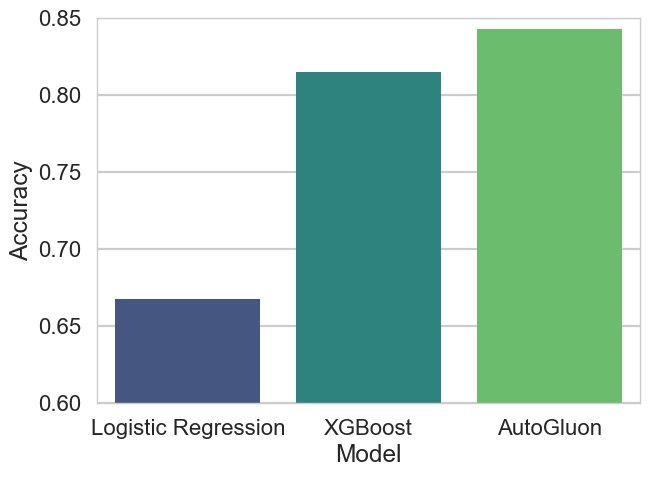

In [103]:
plt.figure(figsize=(7,5))
plt.style.use('default')
plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-poster')
sns.barplot(x=df_results['Model'], y=df_results['Accuracy'], palette='viridis')
plt.ylim(0.6, 0.85)